In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# variables and functions:
# \tau = T(r)/T_0
# \lambda = G*M*M_sun/(2*a*k*T_0)
# \psi = 1/2*M*v**2/(k*T_0)
# \xi = r/a
# v = v(r)
# T = T(r)

r, T_0, v_0, N_0 = sp.symbols('r T_0 v_0 N_0')
M = 1.6735575e-24
k = 1.380658e-16
G = 6.67259e-8
M_sun = 1.989e33
# a = 1e11
a = sp.symbols('a')

# xi = r/a
xi = sp.symbols('\\xi')
# r = a*xi

v = sp.Function('v')(r)
T = sp.Function('T')(r)

psi = 1/2*M*sp.Pow(v,2)/(k*T_0)
λ = G*M*M_sun/(2*a*k*T_0)
tau = T / T_0

In [3]:
# equation: \psi - \ln\psi = \psi_0 - \ln\psi_0 + 4\ln\xi - 2\lambda\left(1 - \frac{1}{\xi}\right)
# solve for v(r)
eq = sp.Eq(psi - sp.log(psi), psi.subs(r, a) - sp.log(psi.subs(r, a)) + 4*sp.log(xi) - 2*λ*(1 - 1/xi))
# sol = sp.solve(eq, v)[0]
# print('v(r) =', sp.latex(sol))

# print(sp.latex(eq))

# after copying and pasting, let us graph y w.r.t x:
# - \log{\left(\frac{6.06072430681603 \cdot 10^{-9} (100000y)^2}{T_{0}} \right)} + \frac{6.06072430681603 \cdot 10^{-9} (100000y)^2}{T_{0}} = 4 \log{\left(x \right)} - \log{\left(\frac{6.06072430681603 \cdot 10^{-9} v_0^2}{T_{0}} \right)} + \frac{6.06072430681603 \cdot 10^{-9} v_0^2}}{T_{0}} - \frac{1.60873217584817 \cdot 10^{18} \cdot \left(1 - \frac{1}{x}\right)}{T_{0} a}
x, y = sp.symbols('x y')
eq2 = sp.Eq(-sp.log(6.06072430681603e-9*100000**2*y**2/T_0) + 6.06072430681603e-9*100000**2*y**2/T_0, 4*sp.log(x) - sp.log(6.06072430681603e-9*v_0**2/T_0) + 6.06072430681603e-9*v_0**2/T_0 - 1.60873217584817e18*(1 - 1/x)/(T_0*a))
s = sp.symbols('s')
eq3 = sp.Eq(psi - sp.log(psi), psi.subs(r, a) - sp.log(psi.subs(r, a)) + 4*sp.log((xi-s/a)/(1-s/a)) - 2*λ*(1 - 1/xi))
# print(sp.latex(eq3))

eq4 = (2/3)**(1/2)*psi**(1/2)*(1/2*(psi.subs(v,500*100000)-psi)-1)
# print(sp.latex(eq4))

# -\log\left(\frac{6.06072430681603\cdot10^{-9}\left(y\cdot100000\right)^{2}}{T_{0}}\right)+\frac{6.06072430681603\cdot10^{-9}\left(y\cdot100000\right)^{2}}{T_{0}}=4\log\left(x\right)-\log\left(\frac{6.06072430681603\cdot10^{-9}v_{0}^{2}}{T_{0}}\right)+\frac{6.06072430681603\cdot10^{-9}v_{0}^{2}}{T_{0}}-\frac{1.60873217584817\cdot10^{18}\cdot\left(1-\frac{1}{x}\right)}{T_{0}a}
eq_g = sp.Eq(-sp.log(6.06072430681603e-9*100000**2*y**2/T_0) + 6.06072430681603e-9*100000**2*y**2/T_0, 4*sp.log(x) - sp.log(6.06072430681603e-9*v_0**2/T_0) + 6.06072430681603e-9*v_0**2/T_0 - 1.60873217584817e18*(1 - 1/x)/(T_0*a))
# - \log{\left(\frac{6.06072430681603 \cdot 10^{-9} (100000y)^2}{T_{0}} \right)} + \frac{6.06072430681603 \cdot 10^{-9} (100000y)^2}{T_{0}} = - \log{\left(\frac{6.06072430681603 \cdot 10^{-9} v_0^{2}}{T_{0}} \right)} + 4 \log{\left(\frac{x - \frac{s}{a}}{1 - \frac{s}{a}} \right)} + \frac{6.06072430681603 \cdot 10^{-9} v_0^{2}}{T_{0}} - \frac{1.60873217584817 \cdot 10^{18} \cdot \left(1 - \frac{1}{x}\right)}{T_{0} a}
eq_gs = sp.Eq(-sp.log(6.06072430681603e-9*100000**2*y**2/T_0) + 6.06072430681603e-9*100000**2*y**2/T_0, -sp.log(6.06072430681603e-9*v_0**2/T_0) + 4*sp.log((x-s/a)/(1-s/a)) + 6.06072430681603e-9*v_0**2/T_0 - 1.60873217584817e18*(1 - 1/x)/(T_0*a))

In [4]:
# nsolve
def solve_equation(equation,x_value):
    # Provide an initial guess for y. Here, we use 1 as a starting point.
    initial_guess = 1000
    # Solve the equation for y
    try:
        y_solution = sp.nsolve(equation.subs(x, x_value), y, initial_guess)
    except ValueError:
        y_solution = solve_equation(equation, x_values[list(x_values).index(x_value)-1])
    return y_solution

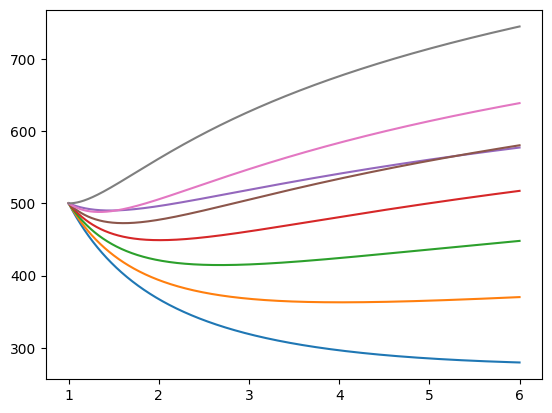

In [5]:
# Generate a range of x values
x_values = np.linspace(1, 6, 1000)  # Avoid x = 0 due to the logarithm

# Calculate corresponding y values
my_velocities = []
my_T_0s = [0.5e6,1e6,1.5e6,2e6,2.5e6,3e6,4e6]
for i in my_T_0s:
    my_velocities.append([solve_equation(eq_g.subs({T_0: i, v_0: 500*100000, a: 1e11}),x_val) for x_val in x_values])
    plt.plot(x_values, my_velocities[-1], label=f'{i} K')
    if i == 2e6:
        my_velocities.append([solve_equation(eq_gs.subs({T_0: i, v_0: 500*100000, a: 1e11, s: 0.4e11}),x_val) for x_val in x_values])
        plt.plot(x_values, my_velocities[-1], label=f'{i} K, s = 0.4a')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


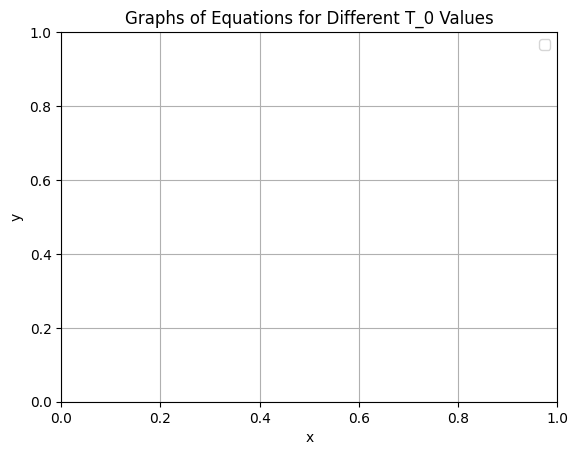

In [6]:
# Plot the results
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphs of Equations for Different T_0 Values')
plt.legend()
plt.grid(True)
plt.show()

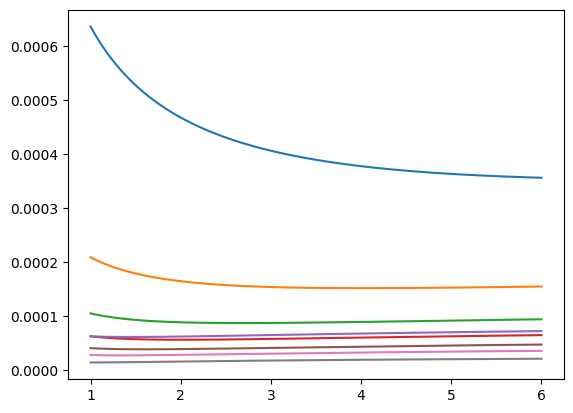

In [7]:
w_u_fracs = []
# insert another 2e6
my_T_0s = [0.5e6,1e6,1.5e6,2e6,2e6,2.5e6,3e6,4e6]
# 6.35647927017046 \cdot 10^{-5} \left(\frac{v^{2}{\left(r \right)}}{T_{0}}\right)^{0.5} \left(-1 - \frac{3.03036215340801 \cdot 10^{-9} v^{2}{\left(r \right)}}{T_{0}} + \frac{7575905.38352003}{T_{0}}\right)
# replace v(r) with my_velocities[i][x_val]
for i in range(0,len(my_T_0s)):
    w_u_fracs.append([6.35647927017046e-5*(my_velocities[i][x_val]**2/my_T_0s[i])**0.5*(-1-3.03036215340801e-9*my_velocities[i][x_val]**2/my_T_0s[i]+7575905.38352003/my_T_0s[i]) for x_val in range(0,len(x_values))])
    if i != 4:
        plt.plot(x_values, w_u_fracs[-1], label=f'{my_T_0s[i]} K')
    else:
        plt.plot(x_values, w_u_fracs[-1], label=f'{my_T_0s[i]} K, s = 0.4a')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


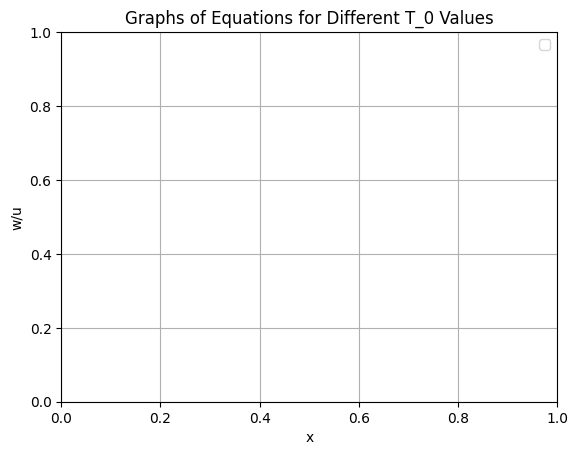

In [8]:
# Plot the results
plt.xlabel('x')
plt.ylabel('w/u')
plt.title('Graphs of Equations for Different T_0 Values')
plt.legend()
plt.grid(True)
plt.show()